# [RNN으로 비트 코인 시세 예측]

In [129]:
# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [130]:
# 하이퍼 파라미터 설정

MY_PAST = 5     # 과거 데이터 수
MY_HIDDEN = 256     # LSTM 단에서 계산하는 데이터 수
MY_EPOCH = 100

              Close
count   2674.000000
mean   10896.681809
std    15827.582731
min      178.102997
25%      598.865479
50%     6199.244140
75%    10253.590576
max    67566.828125


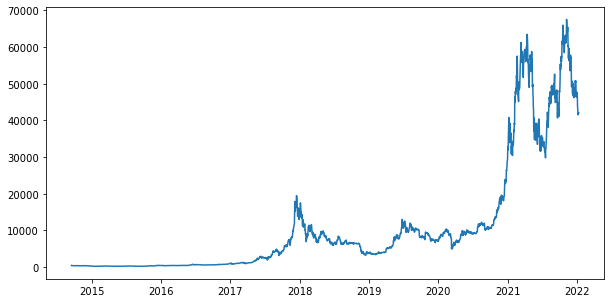

In [131]:
# 데이터 읽기

data = pd.read_csv('bitcoin.csv',
                    usecols=['Date','Close'],
                    parse_dates=True,
                    index_col='Date')

# 샘플 출력
print(data.describe())
plt.figure(figsize=(10,5))
plt.plot(data)
plt.show()

In [132]:
# 데이터 정규화
scaler = MinMaxScaler()
m_data = scaler.fit_transform(data)

print(m_data)
# 정규화 하면 numpy 되니까 pandas로 전환
tmp = pd.DataFrame(m_data)
print(tmp.describe())


[[0.00414359]
 [0.00365546]
 [0.00321557]
 ...
 [0.61929497]
 [0.61795439]
 [0.62192402]]
                 0
count  2674.000000
mean      0.159056
std       0.234870
min       0.000000
25%       0.006244
50%       0.089349
75%       0.149513
max       1.000000


In [133]:
# 데이터 나누기

split = []
size = len(m_data)

print(size)

for i in range(size - MY_PAST):
    split.append(m_data[i: i + MY_PAST + 1])

print(len(split))

split = np.array(split)
print('최종 데이터 shape: ', split.shape)

print(split)

2674
2669
최종 데이터 shape:  (2669, 6, 1)
[[[0.00414359]
  [0.00365546]
  [0.00321557]
  [0.00342492]
  [0.0032753 ]
  [0.00332473]]

 [[0.00365546]
  [0.00321557]
  [0.00342492]
  [0.0032753 ]
  [0.00332473]
  [0.0038239 ]]

 [[0.00321557]
  [0.00342492]
  [0.0032753 ]
  [0.00332473]
  [0.0038239 ]
  [0.00363714]]

 ...

 [[0.67844393]
  [0.64388962]
  [0.6378341 ]
  [0.61404633]
  [0.61665862]
  [0.61929497]]

 [[0.64388962]
  [0.6378341 ]
  [0.61404633]
  [0.61665862]
  [0.61929497]
  [0.61795439]]

 [[0.6378341 ]
  [0.61404633]
  [0.61665862]
  [0.61929497]
  [0.61795439]
  [0.62192402]]]


In [134]:
# 데이터를 학습용과 평가용으로 분할
X_data = split[:, :MY_PAST]
Y_data = split[:, -1]

print('입력 데이터 모양: ', X_data.shape)
print('출력 데이터 모양: ', Y_data.shape)

입력 데이터 모양:  (2669, 5, 1)
출력 데이터 모양:  (2669, 1)


In [135]:
# RNN 구현
model = Sequential()

# LSTM 층
model.add(LSTM(units=MY_HIDDEN,
                input_shape=(MY_PAST,1)))

# 출력층
model.add(Dense(units=1))

# RNN 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [136]:
# RNN 학습
model.compile(optimizer='adam',
                loss='mse')

print('학습 시작')
begin = time()

model.fit(X_data,Y_data,epochs=MY_EPOCH,verbose=1)

end = time()
print('총 학습 시간 :',end-begin)

학습 시작
Epoch 1/100
84/84 [==============================] - 2s 9ms/step - loss: 0.0056
Epoch 2/100
84/84 [==============================] - 1s 10ms/step - loss: 3.3555e-04
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 3.3099e-04
Epoch 4/100
84/84 [==============================] - 1s 8ms/step - loss: 3.4137e-04
Epoch 5/100
84/84 [==============================] - 1s 9ms/step - loss: 3.1287e-04
Epoch 6/100
84/84 [==============================] - 1s 8ms/step - loss: 3.1680e-04
Epoch 7/100
84/84 [==============================] - ETA: 0s - loss: 3.4999e-0 - 1s 8ms/step - loss: 3.4329e-04
Epoch 8/100
84/84 [==============================] - 1s 8ms/step - loss: 3.2614e-04
Epoch 9/100
84/84 [==============================] - 1s 9ms/step - loss: 3.2493e-04
Epoch 10/100
84/84 [==============================] - 1s 9ms/step - loss: 3.0345e-04
Epoch 11/100
84/84 [==============================] - 1s 9ms/step - loss: 3.2204e-04
Epoch 12/100
84/84 [=======================

In [137]:
# RNN 예측
pred = model.predict(X_data)
pred_ori = scaler.inverse_transform(pred)
Y_data_ori = scaler.inverse_transform(Y_data)
print('RNN이 오늘 비트코인 예측한 값:',pred_ori[-1])
print('오늘 비트코인 값 :',Y_data_ori[-1])

RNN이 오늘 비트코인 예측한 값: [40762.99]
오늘 비트코인 값 : [42088.769531]


In [138]:
# 내일 시세 예측
tmp = data[-5:]
# print(tmp)
tom = m_data[-5:]
# print(tom)

# 인공신경망에 사용되는 데이터는 항상 배치정보 있어야 함
tom = tom.reshape(1,5,1)
pred_tom = model.predict(tom)
print('RNN이 예측한 내일 비트코인 시세 : ',pred_tom)

pred_tom = scaler.inverse_transform(pred_tom)
print('<RNN이 예측한 내일 비트코인 시세 (역전화) : {}달러'.format(pred_tom[0,0]))

                   Close
Date                    
2022-01-07  41557.902344
2022-01-08  41733.941406
2022-01-09  41911.601563
2022-01-10  41821.261719
2022-01-11  42088.769531
[[0.61404633]
 [0.61665862]
 [0.61929497]
 [0.61795439]
 [0.62192402]]
RNN이 예측한 내일 비트코인 시세 :  [[0.6054834]]
<RNN이 예측한 내일 비트코인 시세 (역전화) : 40980.859375달러
